<a href="https://colab.research.google.com/github/AbimaelLopez/Diplomado/blob/main/4_KNN_para_regresi%C3%B3n_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 KNN para regresión<br>

### Objetivo
Que la o el estudiante comprenda los elementos básicos que componen al algoritmo supervisado K-Nearest Neighbors para un problema de regresión.

### Descripción del procedimiento a seguir
- Se construye un conjunto de datos sintético
- Se define un nuevo punto
- Se implementa el algoritmo de KNN para regresión
- Se deja de ejercicio usar el regresor KNN de la biblioteca sklearn

### Datos
**Profesora**: Dra. Jessica Beltrán Márquez<br>
Maestría en Ciencia de Datos y Optimización <br>
Centro de Investigación en Matemáticas Aplicadas <br>
Universidad Autónoma de Coahuila


### Bibliografía
1. https://pandas.pydata.org/
2. https://matplotlib.org/
3. https://scikit-learn.org
4. https://numpy.org/

### **1. Importar bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **2. Creamos un DataFrame que contiene los datos que usaremos**

Este conjunto esta formado por dos columnas, una que indica un tamaño y otra un precio. En este caso, la columna 'Precio' es el target, que incluye valores numéricos que usaremos en este problema de regresión.
<br>

NOTA: Este es un ejemplo didáctico y todo este dataset se utilizará para entrenamiento. Se probará con un nuevo valor de tamaño.

In [2]:
# Crear un diccionario con los datos
datos = {
    'Tamaño': [120, 150, 100, 180, 200, 130, 160, 140, 190],
    'Precio': [250, 300, 200, 350, 400, 270, 320, 280, 370]
}

# Crear un DataFrame
df = pd.DataFrame(datos)

In [3]:
df.head()

,Tamaño,Precio
0,120,250
1,150,300
2,100,200
3,180,350
4,200,400


### **3. Convertir a arreglos numpy**
Para este ejercicio, vamos a convertir los DataFrames a arreglos numpy.

In [4]:
#Nuestro vector de características
X = np.array(df['Tamaño'])

In [5]:
#Nuestro vector de targets
y = np.array(df['Precio'])

### **4. Definimos un nuevo punto, del que queremos predecir el valor**

In [6]:
new_p = np.array([163])

### **5. Programamos el algoritmo de KNN para regresión**
En este caso, a diferencia de cuando se trabaja con problemas de clasificación,  no se usa un esquema de votación para elegir la clase predica, sino que se obtiene el valor medio entre los valores de los vecinos más cercanos.

In [7]:
#Definimos el número de vecinos más cercanos que queremos
k=4

# Se calcula la distanca entre el nuevo punto y todos los puntos del dataset
distances = [np.linalg.norm(new_p - x) for x in X]

# Se ordenan las distancias de menor a mayor y se eligen el índice de las primeras k
k_indices = np.argsort(distances)[:k]

# Se obtienen los valores target de los vecinos más cercanos
k_nearest_neighbors = [y[i] for i in k_indices]

# Se calcula la media de los valores target de los vecinos más cercanos
prediction = np.mean(k_nearest_neighbors)

#Imprimimos el valor predicho
print(prediction)

312.5


### **6. Graficamos los puntos del dataset, los vecinos más cercanos y el valor target predicho**

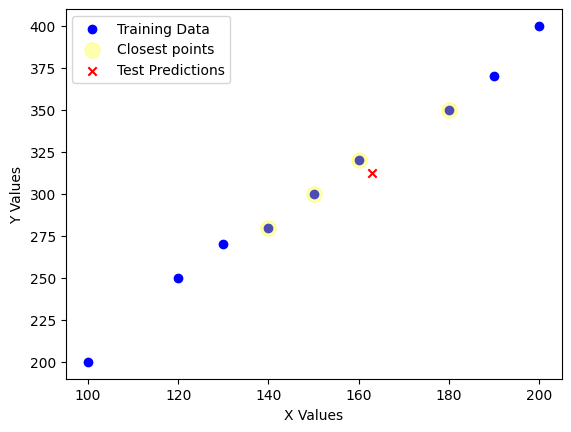

In [8]:
# Graficamos los puntos del conjunto ed datos
plt.scatter(X, y, label="Training Data", color="blue")

# Graficamos los vecinos más cercanos
plt.scatter(X[k_indices],y[k_indices],label='Closest points', color ='yellow', marker='o', s=120, alpha=0.3)

# Graficamos el valor target predicho
plt.scatter(new_p, prediction, label="Test Predictions", color="red", marker="x")

plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

### **7. Ejercicio. Utiliza el *KNeighborsRegressor* de la biblioteca Sklearn para hacer predicciones**

- Entrena con el mismo conjunto de datos
- Prueba con el mismo nuevo punto

NOTA: Quizás te salga un error *'Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample'*. Si esto, sucede, modifica X por X.reshape(-1, 1) y haz la otra modificación necesaria.

Puedes encontrar información en:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [10]:
# Crear un diccionario con los datos
datos = {
    'Tamaño': [120, 150, 100, 180, 200, 130, 160, 140, 190],
    'Precio': [250, 300, 200, 350, 400, 270, 320, 280, 370]
}

# Crear un DataFrame
df = pd.DataFrame(datos)

In [19]:
from sklearn.neighbors import KNeighborsRegressor   #Modelo de clasificación
# Initialize the KNN classifier
knn_classifier = KNeighborsRegressor(n_neighbors=4)  # Aqui ajustamos el número de vecinos

# Ajustamos el modelo a los datos de entrenamiento
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

knn_classifier.fit(X, y)

new_p = pd.DataFrame({'Tamaño': [163]})

pred = knn_classifier.predict(new_p)
print(pred)


[312.5]
